## Description of the Dataset

This project uses the Gold Price dataset from Kaggle: [Gold Price Data](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data).

According to the author:

> “This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX, GLD, USO, SLV, EUR/USD against the dates in the date column.”

**Columns**:
- `Date`: Date of the observation
- `SPX`: S&P 500 index
- `GLD`: Gold ETF price (**target variable**)
- `USO`: Oil ETF price
- `SLV`: Silver ETF price
- `EUR/USD`: Euro to US Dollar exchange rate

The objective is to predict the **GLD price** using the other variables.


In [55]:
# importing essentials libraries
# for preprocessing and exploratory analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading data into a df
df = pd.read_csv('gld_price_data.csv')
df.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
df_info = df.info()
df_describe = df.describe()
df_shape = df.shape

df_info, df_describe, df_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


(None,
                SPX          GLD          USO          SLV      EUR/USD
 count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
 mean   1654.315776   122.732875    31.842221    20.084997     1.283653
 std     519.111540    23.283346    19.523517     7.092566     0.131547
 min     676.530029    70.000000     7.960000     8.850000     1.039047
 25%    1239.874969   109.725000    14.380000    15.570000     1.171313
 50%    1551.434998   120.580002    33.869999    17.268500     1.303297
 75%    2073.010070   132.840004    37.827501    22.882500     1.369971
 max    2872.870117   184.589996   117.480003    47.259998     1.598798,
 (2290, 6))

In [16]:
# checking for nas
df.isna().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
# let's drop the date column, as it will not be necessary
df = df.drop('Date', axis=1)
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

No alterations in the data were necessary till now,
so we continue to the EDA process

## Exploratory Data Analysis

To understand the relationships between features and the target variable (`GLD`), we explore summary statistics, distributions, and a correlation heatmap. This helps identify important predictors and potential multicollinearity.

No missing values were found, and the strongest correlation with `GLD` was from `SLV` and `EUR/USD`.


<Axes: >

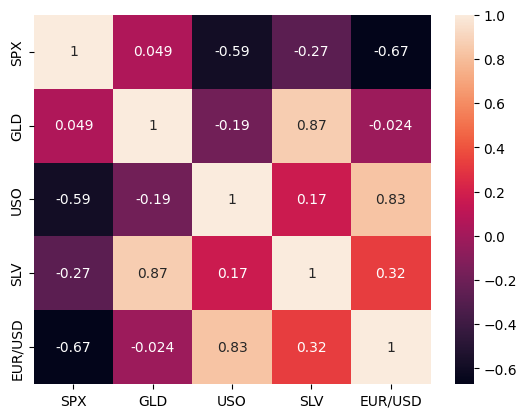

In [18]:
# creating a correlation heatmap
# with sns
cor = df.corr()
sns.heatmap(cor, annot=True)

we can observe that there is a high corr (ABS(> 0.5)) between:
SPX, USO
SPX, EUR/USD
GLD, SLV
USO, EUR/USD

In [19]:
cor['GLD'] # here we see that SLV has a high positive Cor iwht GLD

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

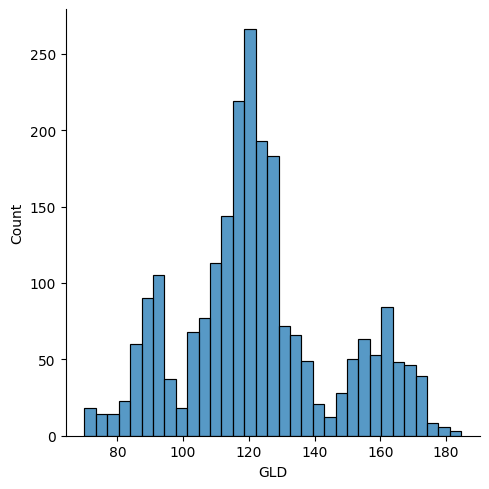

In [20]:
# lets do a final check into the distribution of
# our target variable
sns.displot(df['GLD'])

as we saw, our data seems ready for modelling so we are going ahead and split the data so we can start building a model. \
Random Forest is not sensitive to multicollinearity. \
So it is not necessary to drop columns with low corr -> as the model can learn from non-linear relationships.

## Data Preprocessing

The `Date` column was dropped since it is not numeric and not useful for regression modeling.  
The remaining columns were split into features (`SPX`, `USO`, `SLV`, `EUR/USD`) and the target (`GLD`).  
The data was then split into a **training set (80%)** and a **test set (20%)**.  
No scaling was applied, as tree-based models do not require feature standardization.


In [21]:
# let's import the necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
df.columns #date is dropped

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [23]:
# let's separate our target variable
# and do a train-test split
X = df.drop('GLD', axis=1)
y = df['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X, y

(              SPX        USO      SLV   EUR/USD
 0     1447.160034  78.470001  15.1800  1.471692
 1     1447.160034  78.370003  15.2850  1.474491
 2     1411.630005  77.309998  15.1670  1.475492
 3     1416.180054  75.500000  15.0530  1.468299
 4     1390.189941  76.059998  15.5900  1.557099
 ...           ...        ...      ...       ...
 2285  2671.919922  14.060000  15.5100  1.186789
 2286  2697.790039  14.370000  15.5300  1.184722
 2287  2723.070068  14.410000  15.7400  1.191753
 2288  2730.129883  14.380000  15.5600  1.193118
 2289  2725.780029  14.405800  15.4542  1.182033
 
 [2290 rows x 4 columns],
 0        84.860001
 1        85.570000
 2        85.129997
 3        84.769997
 4        86.779999
            ...    
 2285    124.589996
 2286    124.330002
 2287    125.180000
 2288    124.489998
 2289    122.543800
 Name: GLD, Length: 2290, dtype: float64)

## Modeling

We compare two machine learning models:
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

Both models were evaluated using:
1. Default parameters
2. Cross-validation (5-fold)
3. GridSearchCV for hyperparameter tuning

The models were then retrained on the full training set using the best-found parameters and evaluated on the test set.


In [24]:
# start and train models
# we are using random forest and Gradient boosting regressor

# RANDOM FOREST
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train) # fit the train data


RandomForestRegressor(random_state=42)

In [25]:
# Gradient Boosting
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [26]:
# predict on test data
rf_pred = rf.predict(X_test)
gbr_pred = gbr.predict(X_test)

In [27]:
# evaluateion metrics on the model
def evaluate(model, y_test, y_pred):
    print(f"\n{model} Evaluation:")
    print(f"R2: {r2_score(y_test, y_pred): .4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# evaluating
evaluate("Random Forest", y_test, rf_pred)
evaluate("Gradient Boosting", y_test, gbr_pred)



Random Forest Evaluation:
R2:  0.9900
MAE: 1.2356
RMSE: 2.3387

Gradient Boosting Evaluation:
R2:  0.9802
MAE: 2.1916
RMSE: 3.2910


for random forest: \
r2 = 0.98993 -> excelent, 98% of variance explained \
MAE = 1.2343 \
RMSE = 2.3487 \

for gradient boosting \
R2:  0.9802 -> a bit worst than RF, but still great \
MAE: 2.1916 \
RMSE: 3.2910 \

In [28]:
# lets follow to a cross validation
rf_cv = cross_val_score(rf, X, y, cv=5, scoring='r2')
gbr_cv = cross_val_score(gbr, X, y, cv=5, scoring='r2')

rf_cv.mean(), gbr_cv.mean()

(np.float64(-0.2937792725853823), np.float64(-0.0008811426052769856))

Random Forest: -0.293 -> default hyperparameters were not well-suited \

Gradient Boosting Regressor: -0.00088 -> Still negative, but very close to 0 -> slight worse than baseline \

the untuned models are not ready for evaluation -> hyperparameter tuning is essential

In [29]:
# paramenter grid for rf
rf_param = {
    'n_estimators': [100,300,500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# parameter grid for GBR
gbr_param = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_param, cv=5, scoring='r2', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
best_gbr = gbr_grid.best_estimator_


In [31]:
# predict and evaluate random forest
rf_best = best_rf.predict(X_test)
rf_best_eval = {
    'best_params': rf_grid.best_params_,
    'r2': r2_score(y_test, rf_best),
    'mae': mean_absolute_error(y_test, rf_best),
    'rmse': np.sqrt(mean_squared_error(y_test, rf_best))
}

# predict and evaluate GBR
# --- Predict and evaluate Gradient Boosting ---
gbr_best = best_gbr.predict(X_test)
gbr_best_eval = {
    'best_params': gbr_grid.best_params_,
    'r2': r2_score(y_test, gbr_best),
    'mae': mean_absolute_error(y_test,gbr_best),
    'rmse': np.sqrt(mean_squared_error(y_test, gbr_best))
}

rf_best_eval, gbr_best_eval

({'best_params': {'max_depth': None,
   'min_samples_split': 2,
   'n_estimators': 500},
  'r2': 0.9902562924777144,
  'mae': 1.2382934384279487,
  'rmse': np.float64(2.3113792025253157)},
 {'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300},
  'r2': 0.9869414094498353,
  'mae': 1.4982054994521146,
  'rmse': np.float64(2.675822086050696)})

## Results and Evaluation

After hyperparameter tuning, the best models were:

- **Random Forest**: `n_estimators=500`, `max_depth=None`, `min_samples_split=2`
- **Gradient Boosting**: `n_estimators=300`, `learning_rate=0.05`, `max_depth=5`

### Final Test Set Performance:

| Model              | R²     | MAE    | RMSE   |
|-------------------|--------|--------|--------|
| RF (Default)       | 0.9900 | 1.2356 | 2.3387 |
| RF (Tuned)         | 0.9902 | 1.2382 | 2.3113 |
| GBR (Default)      | 0.9802 | 2.1916 | 3.2910 |
| GBR (Tuned)        | 0.9869 | 1.4982 | 2.6758 |

### Evaluation Strategy

- A **dedicated test set** was used for final evaluation.
- Cross-validation was applied on the training set only.
- GridSearchCV performed hyperparameter tuning with internal 5-fold CV.
- Evaluation metrics: **R²**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)**.
- Plots were generated to visually compare model performance.

Random Forest with tuned hyperparameters achieved the best performance overall. But all models still show a good accuracy on prediction.


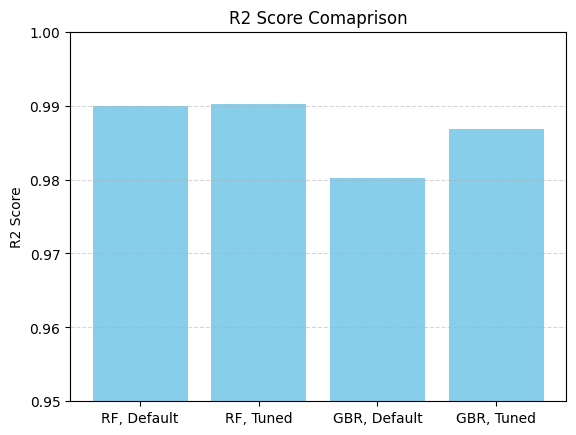

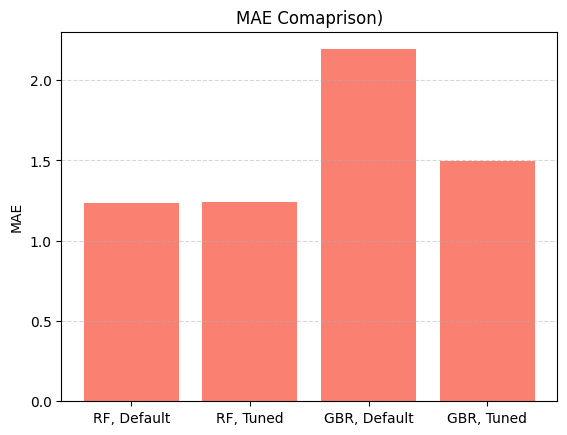

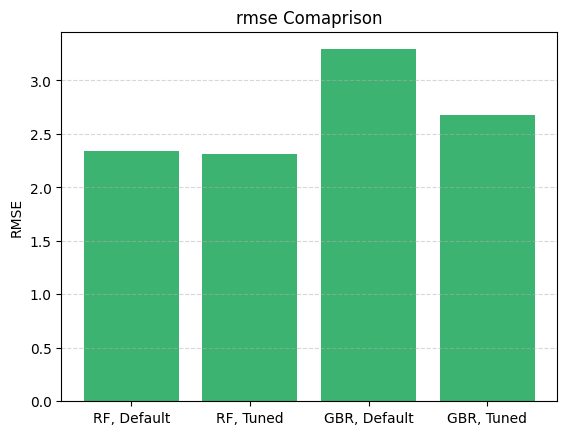

In [54]:
# extra: graph to see how default vs tuned compare
# separating the metrics
models = ['RF, Default', 'RF, Tuned', 'GBR, Default', 'GBR, Tuned']
r2_scores = [0.9900, 0.9902, 0.9802, 0.9869]
mae_scores = [1.2356, 1.2382, 2.1916, 1.4982]
rmse_scores = [2.3387, 2.3113, 3.2910, 2.6758]

# comparing r2
plt.bar(models, r2_scores, color='skyblue')
plt.ylabel('R2 Score')
plt.title('R2 Score Comaprison')
plt.ylim(0.95, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# MAE SCOREs comparsion 
plt.bar(models, mae_scores, color='salmon')
plt.ylabel('MAE')
plt.title('MAE Comaprison)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# rmse score
plt.bar(models, rmse_scores, color='mediumseagreen')
plt.ylabel('RMSE')
plt.title('rmse Comaprison')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


We confirm that the Random Forest Tuned model is the best choice, with the best precision based on all the metrics we looked into.